In [1]:
from surprise.model_selection import train_test_split
from surprise import Dataset
import pandas as pd
from surprise import Reader
from surprise import SVD, KNNBasic, SVDpp
from surprise.model_selection import cross_validate
from sklearn.model_selection import train_test_split as sktrain_test_split
!pip install tabulate

### Data loading

In [2]:
ratings = pd.read_csv(r"C:\Users\sjlal\NYP\Project\FinalData\ratings.csv")
reader = Reader()
raw = Dataset.load_from_df(ratings[['userId','movieId','rating']],reader)


### Train and test set

In [3]:
trainset, testset = train_test_split(raw, test_size=.3, random_state=42)


In [4]:
print("Number of items:" + str(trainset.n_items))
print("Number of ratings:" + str(trainset.n_ratings))
print("Number of users:" + str(trainset.n_users))

#We use the all_ratings generator function to iterates through the user ratings
count = 1
for r in trainset.all_ratings():
  print(r)
  count += 1
  if count == 10:
    break

Number of items:42277
Number of ratings:18217002
Number of users:268903
(0, 0, 4.0)
(0, 5923, 4.0)
(0, 1342, 4.0)
(0, 4324, 4.5)
(0, 6560, 3.5)
(0, 902, 4.5)
(0, 1130, 4.0)
(0, 9133, 3.5)
(0, 3148, 4.5)


### Takes too long to run
svd = SVD()
knn = KNNBasic()
svdpp = SVDpp()

cross_validate(svd, raw, measures=['RMSE', 'MAE'], cv=5, verbose=True)

### Too much data, amount of data is reduced

In [31]:
svd = SVD()
knn = KNNBasic()
svdpp = SVDpp()
epoch = 1000

while epoch <= 5000:
    ratingsmini = ratings.sample(n=epoch, replace=False, random_state=42)
    rawmini = Dataset.load_from_df(ratingsmini[['userId','movieId','rating']],reader)
    trainset, testset = train_test_split(rawmini, test_size=.3, random_state=42)
    out = cross_validate(svd, rawmini, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    print("n= ", epoch, 'mean_rmse = ', mean_rmse)    
    epoch += 1000


Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0325  1.0530  1.0725  1.0917  1.0554  1.0610  0.0199  
MAE (testset)     0.8155  0.8477  0.8492  0.8672  0.8340  0.8427  0.0172  
Fit time          0.03    0.03    0.03    0.03    0.03    0.03    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0660  1.0358  1.1142  1.0246  1.0707  1.0623  0.0313  
MAE (testset)     0.8513  0.8182  0.8939  0.8038  0.8477  0.8430  0.0311  
Fit time          0.05    0.05    0.05    0.05    0.05    0.05    0.00    
Test time         0.00    0.00    0.00    0.00    0.00    0.00    0.00    
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset

In [33]:
svd = SVD()
knn = KNNBasic()
svdpp = SVDpp()
epoch = 10000
summary = []

while epoch <= 50000:
    ratingsmini = ratings.sample(n=epoch, replace=False, random_state=42)
    rawmini = Dataset.load_from_df(ratingsmini[['userId','movieId','rating']],reader)
    trainset, testset = train_test_split(rawmini, test_size=.3, random_state=42)
    out = cross_validate(svd, rawmini, measures=['RMSE', 'MAE'], cv=5, verbose=True)
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    summary.append(["n= ", epoch, 'mean_rmse = ', mean_rmse])
    print("n= ", epoch, 'mean_rmse = ', mean_rmse)
    epoch += 10000
    
print(summary)

Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0306  1.0470  1.0433  1.0397  1.0140  1.0349  0.0118  
MAE (testset)     0.8107  0.8256  0.8207  0.8117  0.7994  0.8136  0.0090  
Fit time          0.27    0.27    0.27    0.27    0.27    0.27    0.00    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
n=  10000 mean_rmse =  1.035
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    1.0304  1.0293  1.0249  1.0131  1.0001  1.0195  0.0115  
MAE (testset)     0.8051  0.8008  0.8016  0.7934  0.7851  0.7972  0.0072  
Fit time          0.54    0.54    0.56    0.56    0.55    0.55    0.01    
Test time         0.01    0.01    0.01    0.01    0.01    0.01    0.00    
n=  20000 mean_rmse =  1.020
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold

In [40]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import time
import datetime
import random

import numpy as np
import six
from tabulate import tabulate

from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

# The algorithms to cross-validate
classes = (SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline,
           CoClustering, BaselineOnly, NormalPredictor)

# ugly dict to map algo names and datasets to their markdown links in the table
stable = 'http://surprise.readthedocs.io/en/stable/'
LINK = {'SVD':'SVD','SVDpp':'SVDpp','NMF':'NMF','SlopeOne':'SlopeOne','KNNBasic':'KNNBasic',
        'KNNWithMeans':'KNNWithMeans','KNNBaseline':'KNNBaseline','CoClustering':'CoClustering',
        'BaselineOnly':'BaselineOnly','NormalPredictor':'NormalPredictor','ml-100k':'ml-100k','ml-1m':'ml-1m'}


# set RNG
np.random.seed(0)
random.seed(0)

dataset = 'ml-100k'
data = Dataset.load_builtin(dataset)
kf = KFold(random_state=42)  # folds will be the same for all algorithms.

table = []
for klass in classes:
    start = time.time()
    out = cross_validate(klass(), data, ['rmse', 'mae'], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    link = LINK[klass.__name__]
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    mean_mae = '{:.3f}'.format(np.mean(out['test_mae']))
    efficient  = str(np.mean(out['test_rmse'])*int(time.time() - start))

    new_line = [link, mean_rmse, mean_mae, cv_time, efficient]
    #print(tabulate([new_line], tablefmt="pipe"))  # print current algo perf
    table.append(new_line)

header = [LINK[dataset],
          'RMSE',
          'MAE',
          'Time',
          'Efficiency'
          ]
print(tabulate(table, header, tablefmt="pipe"))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity ma

In [41]:
from __future__ import (absolute_import, division, print_function,
                        unicode_literals)
import time
import datetime
import random

import numpy as np
import six
from tabulate import tabulate

from surprise import Dataset
from surprise.model_selection import cross_validate
from surprise.model_selection import KFold
from surprise import NormalPredictor
from surprise import BaselineOnly
from surprise import KNNBasic
from surprise import KNNWithMeans
from surprise import KNNBaseline
from surprise import SVD
from surprise import SVDpp
from surprise import NMF
from surprise import SlopeOne
from surprise import CoClustering

# The algorithms to cross-validate
classes = (SVD, SVDpp, NMF, SlopeOne, KNNBasic, KNNWithMeans, KNNBaseline,
           CoClustering, BaselineOnly, NormalPredictor)

# ugly dict to map algo names and datasets to their markdown links in the table
stable = 'http://surprise.readthedocs.io/en/stable/'
LINK = {'SVD':'SVD','SVDpp':'SVDpp','NMF':'NMF','SlopeOne':'SlopeOne','KNNBasic':'KNNBasic',
        'KNNWithMeans':'KNNWithMeans','KNNBaseline':'KNNBaseline','CoClustering':'CoClustering',
        'BaselineOnly':'BaselineOnly','NormalPredictor':'NormalPredictor','ml-100k':'ml-100k','ml-1m':'ml-1m'}


# set RNG
np.random.seed(0)
random.seed(0)

dataset = 'ml-1m'
data = Dataset.load_builtin(dataset)
kf = KFold(random_state=42)  # folds will be the same for all algorithms.

table = []
for klass in classes:
    start = time.time()
    out = cross_validate(klass(), data, ['rmse', 'mae'], kf)
    cv_time = str(datetime.timedelta(seconds=int(time.time() - start)))
    link = LINK[klass.__name__]
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    mean_mae = '{:.3f}'.format(np.mean(out['test_mae']))
    efficient  = str(np.mean(out['test_rmse'])*int(time.time() - start))

    new_line = [link, mean_rmse, mean_mae, cv_time, efficient]
    #print(tabulate([new_line], tablefmt="pipe"))  # print current algo perf
    table.append(new_line)

header = [LINK[dataset],
          'RMSE',
          'MAE',
          'Time',
          'Efficiency'
          ]
print(tabulate(table, header, tablefmt="pipe"))

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity matrix...
Done computing similarity matrix.
Estimating biases using als...
Computing the msd similarity ma

In [43]:
table1m = table #storing table since runtime is huge

In [46]:
svd = SVD()
epoch = 10000
summary = []

while epoch <= 1000000:
    ratingsmini = ratings.sample(n=epoch, replace=False, random_state=42)
    rawmini = Dataset.load_from_df(ratingsmini[['userId','movieId','rating']],reader)
    trainset, testset = train_test_split(rawmini, test_size=.3, random_state=42)
    out = cross_validate(svd, rawmini, measures=['RMSE', 'MAE'], cv=3, verbose=True)
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    summary.append(["n= ", epoch, 'mean_rmse = ', mean_rmse])
    print("n= ", epoch, 'mean_rmse = ', mean_rmse)
    epoch += 10000
    
print(summary)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0183  1.0448  1.0564  1.0399  0.0159  
MAE (testset)     0.7985  0.8246  0.8339  0.8190  0.0150  
Fit time          0.21    0.22    0.22    0.22    0.00    
Test time         0.01    0.01    0.01    0.01    0.00    
n=  10000 mean_rmse =  1.040
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0293  1.0091  1.0266  1.0217  0.0089  
MAE (testset)     0.8052  0.7903  0.8057  0.8004  0.0071  
Fit time          0.45    0.44    0.45    0.45    0.01    
Test time         0.02    0.02    0.02    0.02    0.00    
n=  20000 mean_rmse =  1.022
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    1.0109  1.0120  1.0247  1.0158  0.0063  
MAE (testset)     0.7845  0.7929  0.8013  0.7929  0.0069  
Fit time     

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9639  0.9609  0.9657  0.9635  0.0020  
MAE (testset)     0.7465  0.7444  0.7467  0.7459  0.0010  
Fit time          5.10    5.10    5.04    5.08    0.03    
Test time         0.60    0.58    0.31    0.50    0.13    
n=  230000 mean_rmse =  0.963
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9598  0.9631  0.9651  0.9627  0.0022  
MAE (testset)     0.7427  0.7462  0.7476  0.7455  0.0020  
Fit time          5.29    5.27    5.29    5.28    0.01    
Test time         0.60    0.61    0.60    0.61    0.00    
n=  240000 mean_rmse =  0.963
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9618  0.9640  0.9586  0.9615  0.0022  
MAE (testset)     0.7439  0.7459  0.7425  0.7441  0.0014  
Fit time   

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9484  0.9465  0.9487  0.9479  0.0010  
MAE (testset)     0.7332  0.7319  0.7340  0.7330  0.0009  
Fit time          9.95    9.88    9.85    9.89    0.04    
Test time         1.29    0.96    1.28    1.18    0.15    
n=  450000 mean_rmse =  0.948
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9440  0.9482  0.9490  0.9470  0.0022  
MAE (testset)     0.7301  0.7323  0.7341  0.7322  0.0016  
Fit time          10.09   10.06   10.04   10.06   0.02    
Test time         1.29    1.27    0.94    1.17    0.16    
n=  460000 mean_rmse =  0.947
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9451  0.9475  0.9492  0.9472  0.0017  
MAE (testset)     0.7307  0.7327  0.7332  0.7322  0.0011  
Fit time   

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9384  0.9359  0.9405  0.9383  0.0019  
MAE (testset)     0.7254  0.7233  0.7260  0.7249  0.0012  
Fit time          14.55   14.49   14.46   14.50   0.04    
Test time         1.64    1.27    1.68    1.53    0.19    
n=  670000 mean_rmse =  0.938
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9355  0.9378  0.9389  0.9374  0.0014  
MAE (testset)     0.7233  0.7247  0.7255  0.7245  0.0009  
Fit time          14.82   14.67   14.70   14.73   0.06    
Test time         1.31    1.67    1.29    1.42    0.18    
n=  680000 mean_rmse =  0.937
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9390  0.9383  0.9360  0.9377  0.0013  
MAE (testset)     0.7251  0.7252  0.7232  0.7245  0.0009  
Fit time   

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9343  0.9320  0.9308  0.9324  0.0015  
MAE (testset)     0.7216  0.7192  0.7187  0.7198  0.0013  
Fit time          19.26   19.17   19.18   19.20   0.04    
Test time         1.64    2.02    2.03    1.90    0.18    
n=  890000 mean_rmse =  0.932
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9322  0.9322  0.9319  0.9321  0.0002  
MAE (testset)     0.7192  0.7193  0.7198  0.7194  0.0003  
Fit time          19.49   19.41   19.41   19.44   0.04    
Test time         2.06    2.04    1.64    1.91    0.19    
n=  900000 mean_rmse =  0.932
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9325  0.9324  0.9310  0.9320  0.0007  
MAE (testset)     0.7198  0.7196  0.7185  0.7193  0.0006  
Fit time   

In [47]:
#this was not completed, it is causing the computer to crash
svd = SVD()
epoch = 1000000
summary2 = []

while epoch <= 2000000:
    ratingsmini = ratings.sample(n=epoch, replace=False, random_state=42)
    rawmini = Dataset.load_from_df(ratingsmini[['userId','movieId','rating']],reader)
    trainset, testset = train_test_split(rawmini, test_size=.3, random_state=42)
    out = cross_validate(svd, rawmini, measures=['RMSE', 'MAE'], cv=3, verbose=True)
    mean_rmse = '{:.3f}'.format(np.mean(out['test_rmse']))
    summary2.append(["n= ", epoch, 'mean_rmse = ', mean_rmse])
    print("n= ", epoch, 'mean_rmse = ', mean_rmse)
    epoch += 10000
    
print(summary2)

Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9303  0.9312  0.9300  0.9305  0.0005  
MAE (testset)     0.7178  0.7187  0.7172  0.7179  0.0006  
Fit time          22.70   22.41   21.75   22.29   0.40    
Test time         2.27    2.24    2.23    2.25    0.01    
n=  1000000 mean_rmse =  0.930
Evaluating RMSE, MAE of algorithm SVD on 3 split(s).

                  Fold 1  Fold 2  Fold 3  Mean    Std     
RMSE (testset)    0.9319  0.9293  0.9297  0.9303  0.0011  
MAE (testset)     0.7186  0.7170  0.7176  0.7177  0.0007  
Fit time          23.90   25.29   27.88   25.69   1.65    
Test time         2.74    4.90    173.06  60.23   79.79   
n=  1010000 mean_rmse =  0.930


KeyboardInterrupt: 

In [90]:
i = 0
yaxis = []
while i < 100:
    yaxis.append(summary[i][3])
    i += 1

In [91]:
i = 0
xaxis = []
while i < 100:
    xaxis.append(summary[i][1])
    i += 1

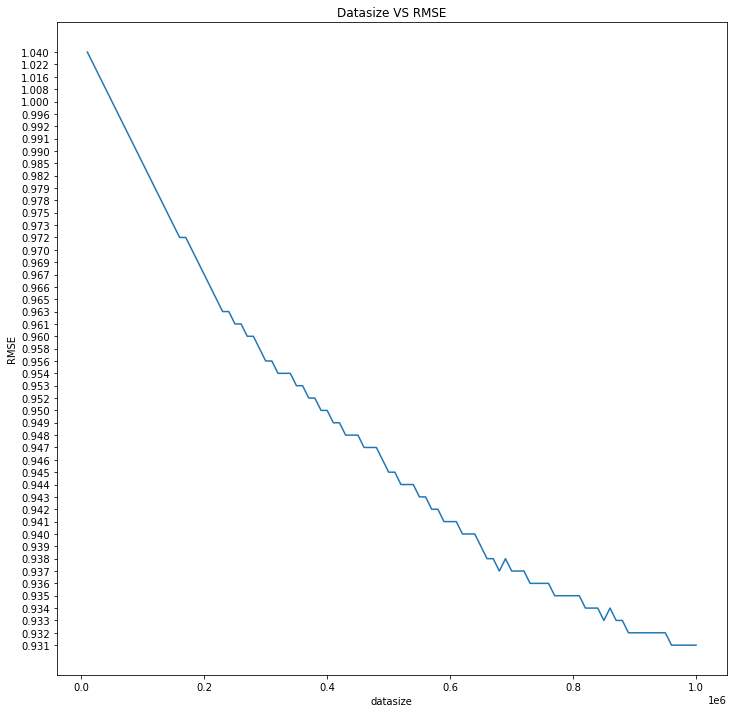

In [101]:
# importing the required module
import matplotlib.pyplot as plt
  
# x axis values
x = xaxis
# corresponding y axis values
y = yaxis
  
# plotting the points 
plt.figure(figsize=(12,12))
plt.gca().invert_yaxis()
plt.plot(x, y)


plt.xlabel('datasize')

plt.ylabel('RMSE')

plt.title('Datasize VS RMSE')
  
# function to show the plot
plt.show()